In [35]:
import cv2
import pandas as pd
import numpy as np
import os
import time
from matplotlib import pyplot as plt


In [36]:
def Thresholding(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # lower_blue = np.array([90,50,50])
  # upper_blue = np.array([130,255,255])

  # lower_orange = np.array([0, 100, 100])
  # upper_orange = np.array([20, 255, 255])

  # lower_green = np.array([40, 40, 40])
  # upper_green = np.array([70, 255, 255])

  # lower_green = np.array([35, 50, 50])
  # upper_green = np.array([90, 255, 255])

  # lower_orange = np.array([0, 100, 100])
  # upper_orange = np.array([20, 255, 255])
  

  lower_gray = np.array([0, 0, 0])
  upper_gray = np.array([220, 220, 220])

  lower_blue = np.array([0, 0, 112])
  upper_blue = np.array([224,255,255])

  lower_white = np.array([200, 200, 200])
  upper_white = np.array([255, 255, 255])
  # lower_blue = np.array([100, 50, 50])
  # upper_blue = np.array([140, 255, 255])

  # mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
  # mask_green = cv2.inRange(hsv, lower_green, upper_green)
  mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
  mask_white = cv2.inRange(hsv, lower_white, upper_white)
  mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)

  # print(mask_white)
  

  final_mask = cv2.bitwise_or(mask_white, cv2.bitwise_or(mask_gray, mask_blue))

  # orange_green_mask = cv2.bitwise_or(mask_orange, mask_green)
  # orange_green_blue_mask = cv2.bitwise_or(orange_green_mask, mask_blue)

  result = cv2.bitwise_and(image, image, mask=final_mask)
  # cv2.imshow('Result', result)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
  mask_cloud = cv2.bitwise_not(mask_blue)

  return result, mask_blue, mask_cloud, mask_gray;

In [37]:
def RGBExtraction(img):

    height, width, _ = img.shape

    total_r = 0
    total_g = 0
    total_b = 0
    total_valid_pixels = 0 

    for y in range(height):
        for x in range(width):
            b, g, r = img[y, x]
            if not (b == 0 and g == 0 and r == 0):
                total_r += np.uint32(r)
                total_g += np.uint32(g)
                total_b += np.uint32(b) 
                total_valid_pixels += 1

    avg_r = round(total_r / total_valid_pixels) if total_valid_pixels != 0 else 0
    avg_g = round(total_g / total_valid_pixels) if total_valid_pixels != 0 else 0
    avg_b = round(total_b / total_valid_pixels) if total_valid_pixels != 0 else 0

    print(f"Rata-rata warna:\nR: {avg_r}, G: {avg_g}, B: {avg_b}\n")

    return [avg_r, avg_g, avg_b]


Proses 1
Rata-rata warna:
R: 165, G: 191, B: 220



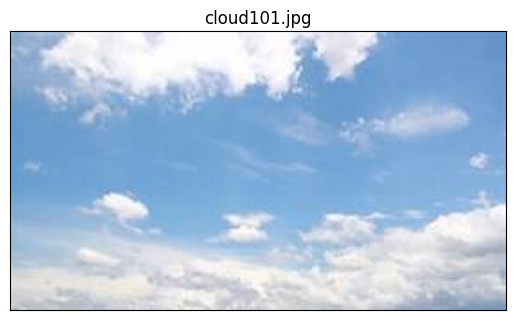

Proses 2
Rata-rata warna:
R: 108, G: 150, B: 196



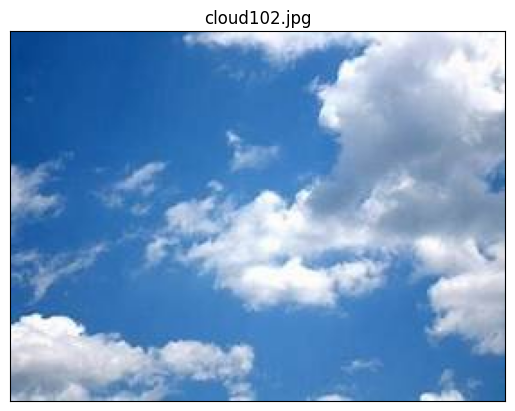

Proses 3
Rata-rata warna:
R: 89, G: 144, B: 199



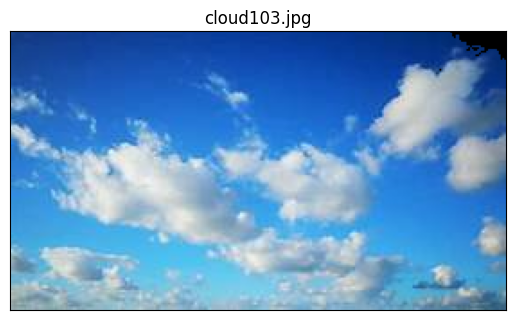

Proses 4
Rata-rata warna:
R: 158, G: 197, B: 229



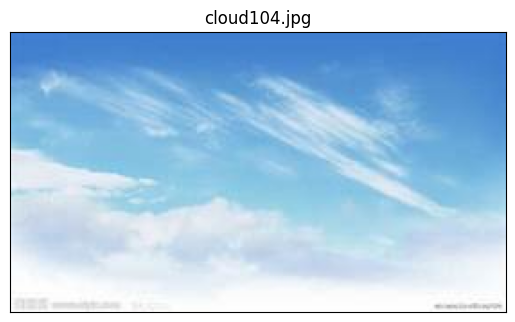

Proses 5
Rata-rata warna:
R: 166, G: 199, B: 224



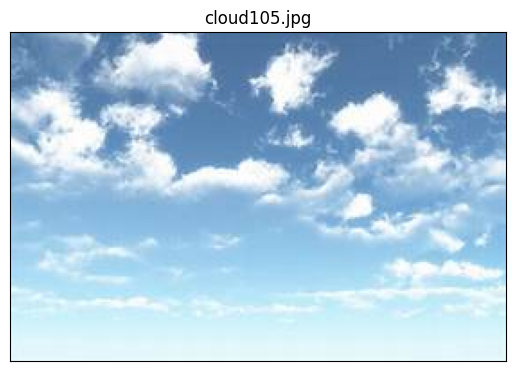

In [38]:

import glob

rgb_results = []
fillers = []

iteration  = 0

# dataset = "./Testing_Weather_Dataset/*.*"
dataset = "./Training_Weather_Dataset/*.*"

for imageFile in glob.glob(dataset):
  if (iteration >= 5):
    break
  iteration += 1

 
  print(f"Proses {iteration}")
  img = cv2.imread(imageFile)

  result, mask_blue, mask_cloud, mask_gray = Thresholding(img)




  # cv2.destroyAllWindows()
  rgb_values = RGBExtraction(result)
  file_name = os.path.basename(imageFile)
  rgb_values.insert(0, file_name)




  gray_pixels = cv2.countNonZero(mask_gray)
  blue_pixels = cv2.countNonZero(mask_blue)
  cloud_pixels = cv2.countNonZero(mask_cloud)

  if "Training" in dataset:
    if cloud_pixels > gray_pixels or cloud_pixels > blue_pixels or (cloud_pixels < blue_pixels and blue_pixels > gray_pixels) :
      if cloud_pixels < blue_pixels and blue_pixels > gray_pixels :
        rgb_values[4:8] = [True, False, False, "Cerah"]
      elif cloud_pixels > blue_pixels and cloud_pixels > gray_pixels:
        rgb_values[4:8] = [False, False, True, "Cerah"]
      else:
        rgb_values[4:8] = [True, False, True, "Cerah"]
    else:
      rgb_values[4:8] = [False, True, False, "Mendung"]
    rgb_values.insert(8,time.asctime( time.localtime(time.time()) ))

  else:
    if cloud_pixels > gray_pixels or cloud_pixels > blue_pixels or (cloud_pixels < blue_pixels and blue_pixels > gray_pixels) :
      if cloud_pixels < blue_pixels and blue_pixels > gray_pixels :
        rgb_values[4:7] = [True, False, False]
      elif cloud_pixels > blue_pixels and cloud_pixels > gray_pixels:
        rgb_values[4:7] = [False, False, True]
      else:
        rgb_values[4:7] = [True, False, True]
    else:
      rgb_values[4:7] = [False, True, False]
    rgb_values.insert(7,time.asctime( time.localtime(time.time()) ))




  
  rgb_results.append(rgb_values)


  # if white_pixels > gray_pixels or (white_pixels > blue_pixels or white_pixels < blue_pixels):
  #   rgb_values.insert(4, "Cerah")
  # elif gray_pixels > white_pixels and gray_pixels > blue_pixels:
  #   rgb_values.insert(4, "Mendung")




  rgb_img =  cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb_img)

  plt.xticks([])
  plt.yticks([])
  plt.title(file_name)

  plt.show()



# for rgb in rgb_results:
#   fill_color = '#{0:02x}{1:02x}{2:02x}'.format(int(rgb[1]), int(rgb[2]), int(rgb[3]))
#   temp = PatternFill(start_color=fill_color,
#                       end_color=fill_color,
#                       fill_type="solid")
#   fillers.append(temp)
if "Training" in dataset:
  df = pd.DataFrame(rgb_results, columns=["Nama File", "Red", "Green", "Blue", "Warna Dominan Biru", "Warna Dominan Abu-Abu", "Warna Dominan Putih", "Kondisi Cuaca", "Waktu"])
  excelFileName = "train.csv"

else:
  df = pd.DataFrame(rgb_results, columns=["Nama File", "Red", "Green", "Blue", "Warna Dominan Biru", "Warna Dominan Abu-Abu", "Warna Dominan Putih", "Waktu"])
  excelFileName = "test.csv"

df.to_csv(excelFileName, index=False)

  # print(RGB.RGBExtraction(Thresholding.Thresholding(img)))

In [39]:
fandango = pd.read_csv(excelFileName)
fandango.head(20)

,Nama File,Red,Green,Blue,Warna Dominan Biru,Warna Dominan Abu-Abu,Warna Dominan Putih,Kondisi Cuaca,Waktu
0,cloud101.jpg,165,191,220,True,False,False,Cerah,Sat Apr 27 20:18:15 2024
1,cloud102.jpg,108,150,196,True,False,False,Cerah,Sat Apr 27 20:18:15 2024
2,cloud103.jpg,89,144,199,True,False,False,Cerah,Sat Apr 27 20:18:15 2024
3,cloud104.jpg,158,197,229,True,False,False,Cerah,Sat Apr 27 20:18:16 2024
4,cloud105.jpg,166,199,224,True,False,False,Cerah,Sat Apr 27 20:18:16 2024
